# CCE3206 - Practical 4 - Poles and zeros
**Graham Pellegrini 0352804L**

## Tasks:

### 1. Transfer Function


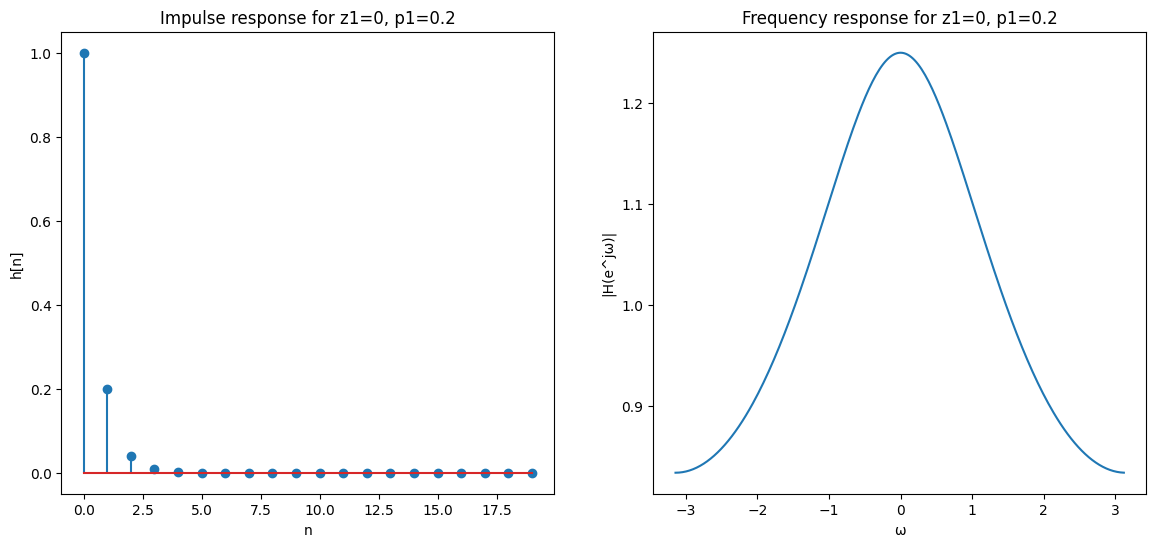

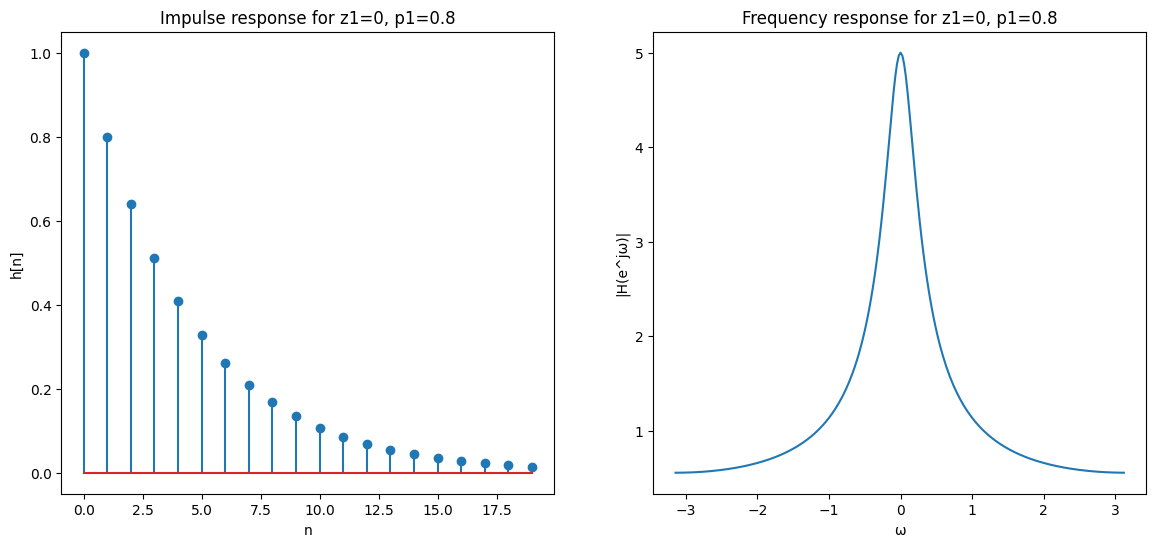

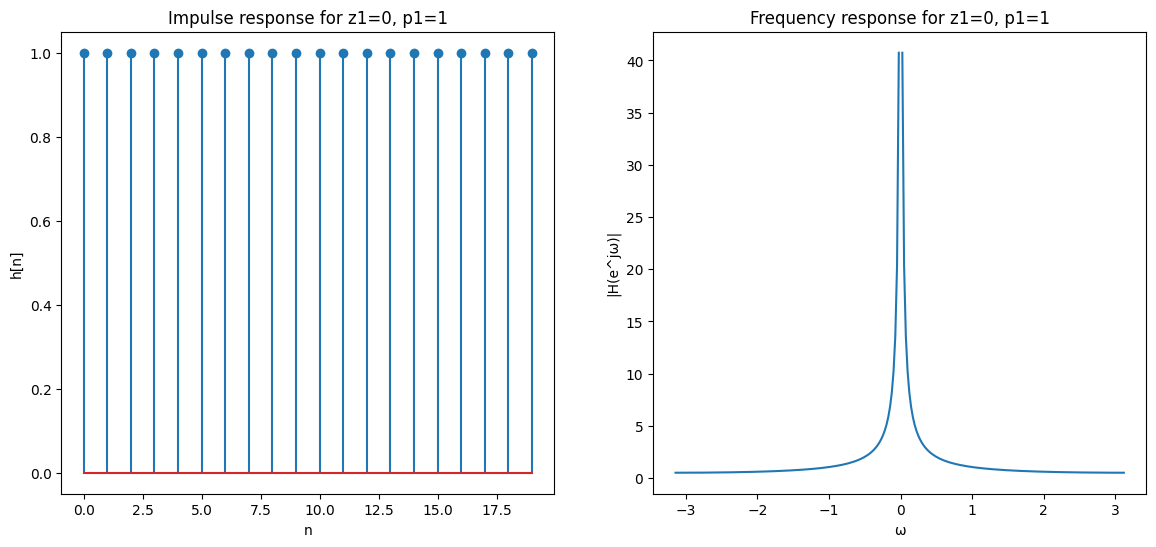

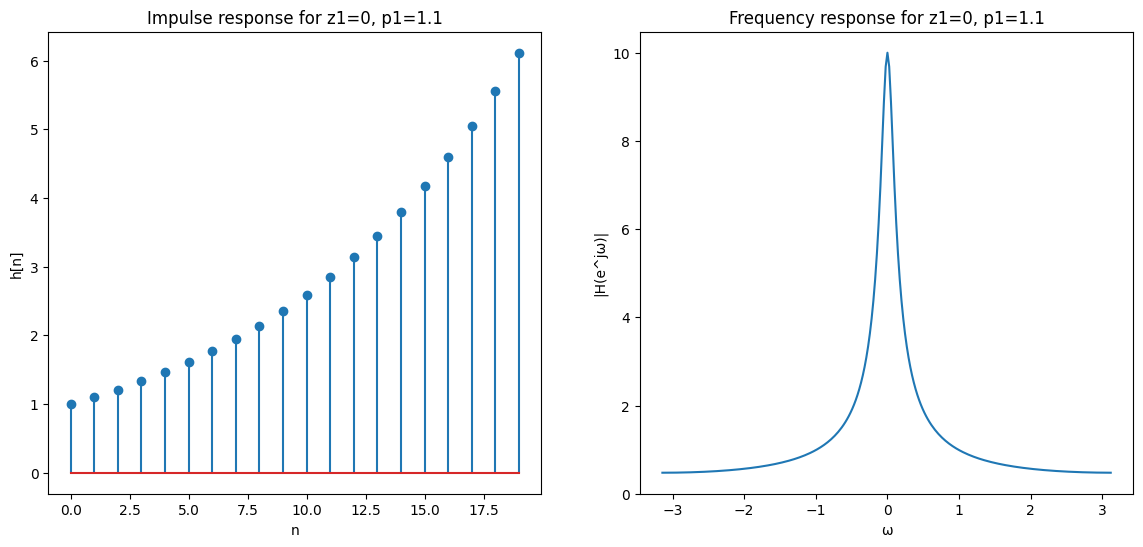

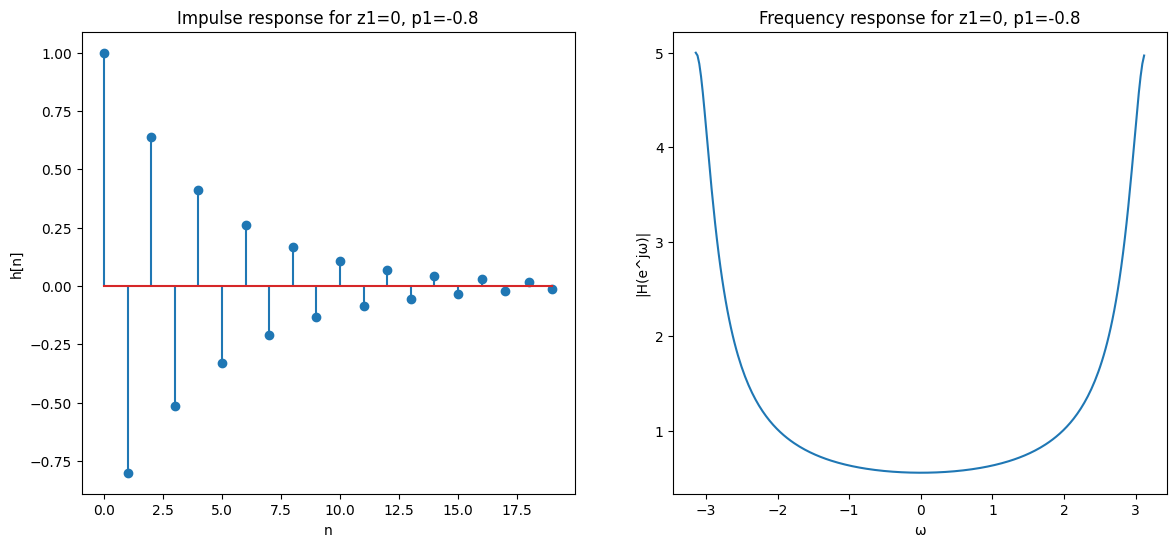

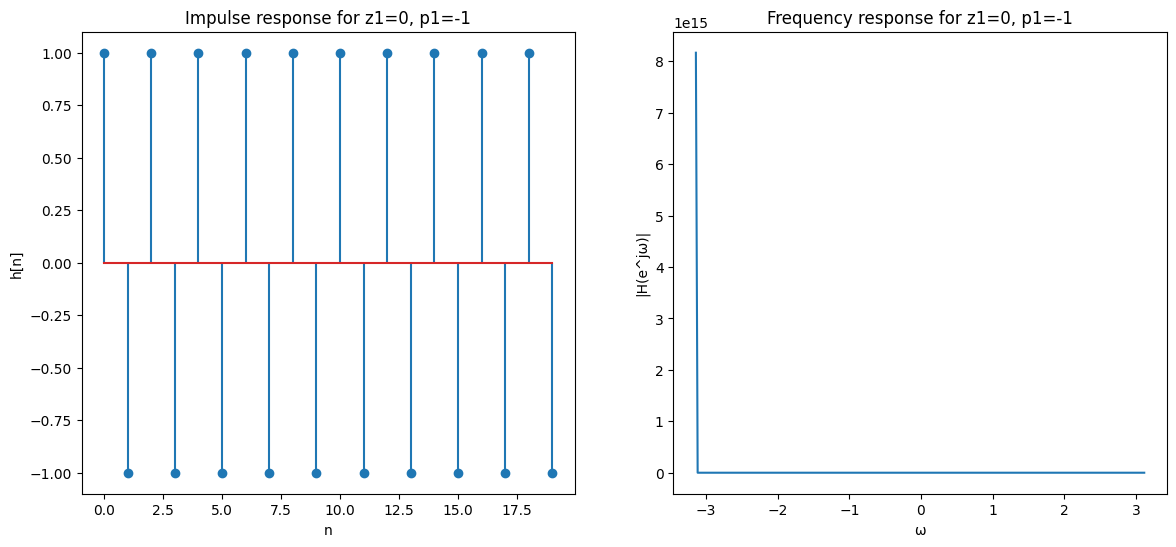

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_response(z1, p1):
    # a)
    # Transfer function: H(z) = (z - z1) / (z - p1)
    G = 1

    # parameters: array of zeros, array of poles, gain
    # Discrete linear time-invariant system 
    system = signal.dlti([z1], [p1], G)
    
    # b)
    # Impulse response with 20 points
    n, h = system.impulse(n=20)
    h = np.squeeze(h)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.stem(n, h)
    ax1.set_xlabel('n')
    ax1.set_ylabel('h[n]')
    ax1.set_title(f'Impulse response for z1={z1}, p1={p1}')

    # c)
    # 256 frequency points from -π to π
    w = np.linspace(-np.pi, np.pi, num=256, endpoint=False)
    # Frequency response
    _, H = system.freqresp(w)
    ax2.plot(w, abs(H))
    ax2.set_xlabel('ω')
    ax2.set_ylabel('|H(e^jω)|')
    ax2.set_title(f'Frequency response for z1={z1}, p1={p1}')

# Values of p1 to test
p1_values = [0.2, 0.8, 1, 1.1, -0.8, -1]
z1 = 0

for p1 in p1_values:
    plot_response(z1, p1) 

**d)**


Poles are the values of the denominator of the transfer function where it equals zero, causing the function to approach infinity. They play a crucial role in determining the system's stability.

The impulse response represents the immediate reaction of the system to a unit impulse input. It provides insight into the system's dynamic behavior. The frequency response indicates how the system responds to various input frequencies, showing which frequencies are passed or attenuated.

- |p₁| < 1: Stable poles lie inside the unit circle (left half-plane in the z-domain) and cause the system's response to decay exponentially.

- |p₁| = 1: Marginally stable poles lie on the unit circle and result in oscillations with constant amplitude, neither converging nor diverging.
- |p₁| > 1: Unstable poles lie outside the unit circle (right half-plane in the z-domain), leading to exponential growth in the system's response.
Key Observations from the Plots:

**Time Response:**
The initial value of h[0]=1 is consistent due to the impulse response, which directly probes the system's gain. Subsequent values in the time response demonstrate the behavior influenced by the poles, but these characteristics are limited by the short impulse response duration.

**Frequency Response**
 The amplitude of the frequency response is strongly tied to the system's poles:
- A stable system exhibits a lower amplitude peak.
- A marginally stable system shows an infinitely high peak.
- An unstable system produces excessively high peaks, reflecting exponential growth in its response to certain frequencies.


### 2. Constant P1 changing Z1


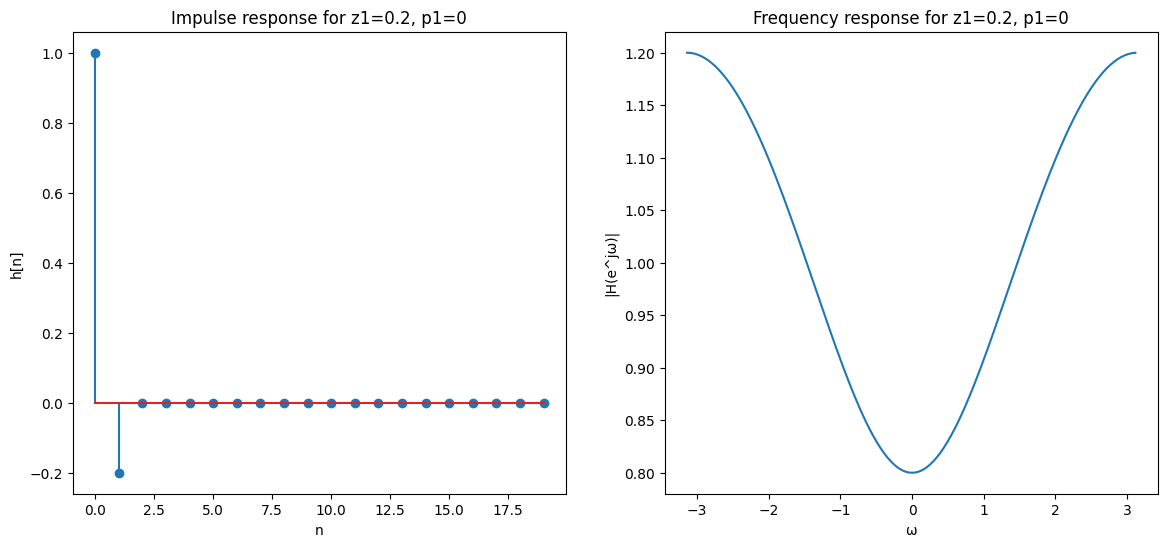

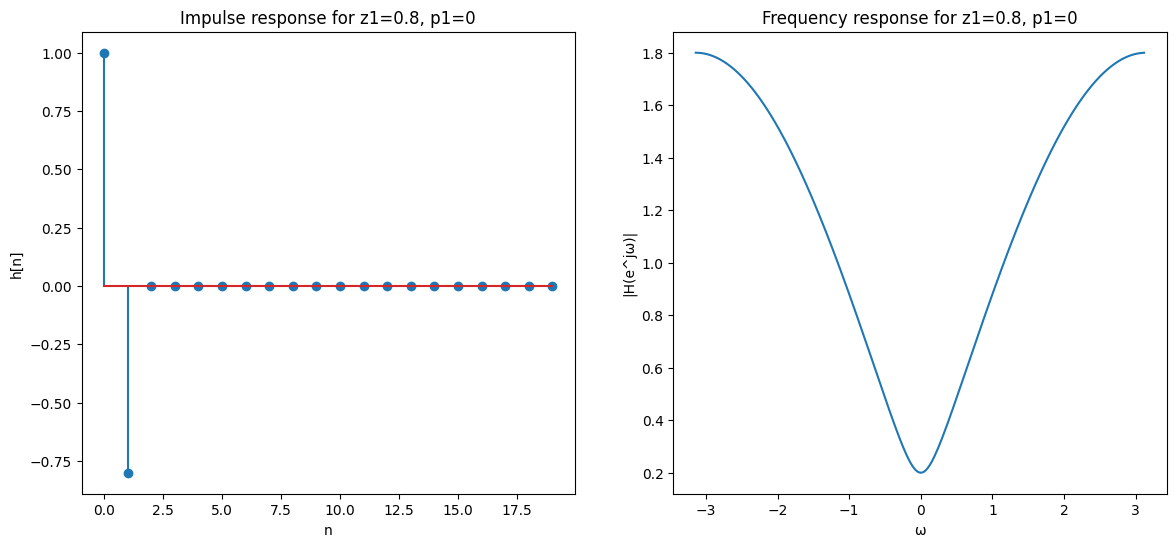

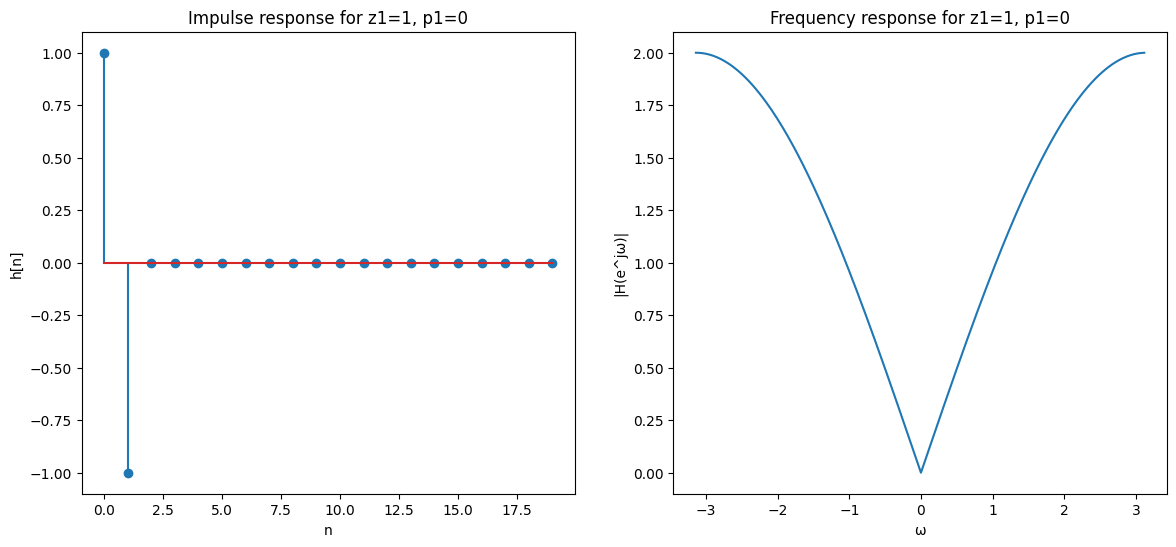

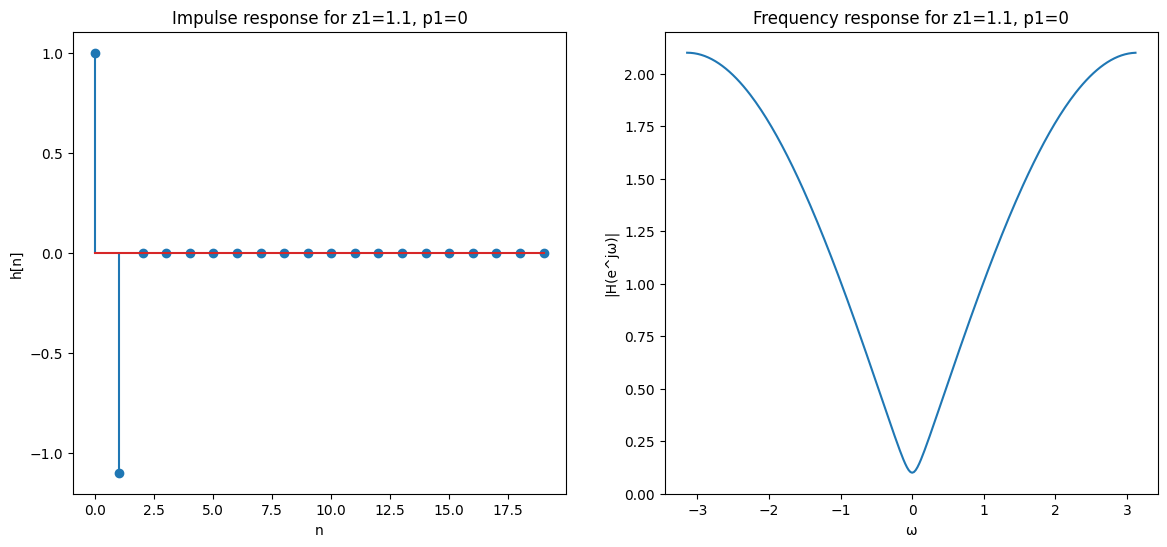

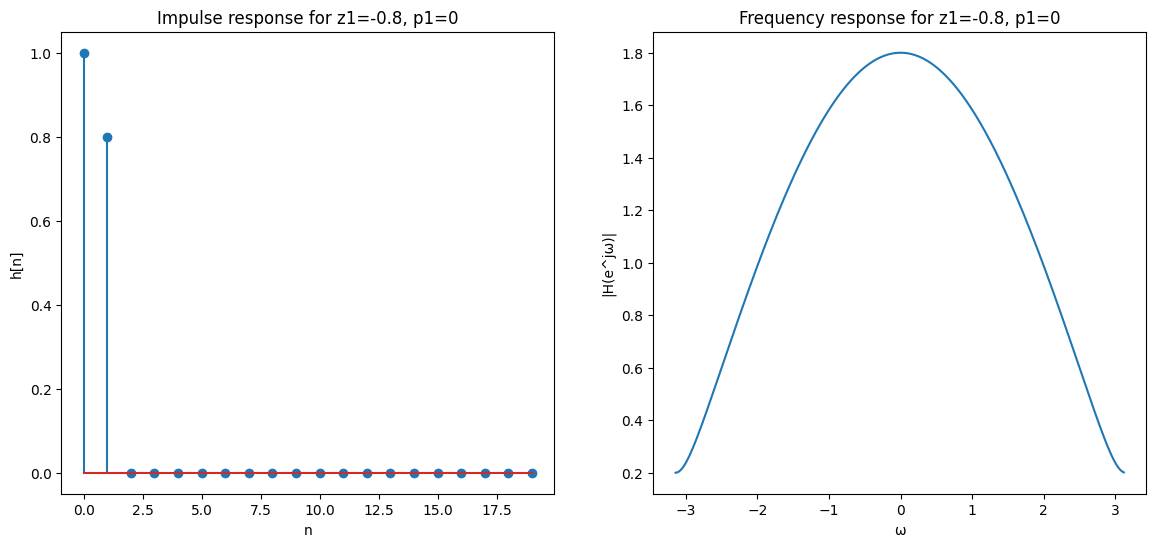

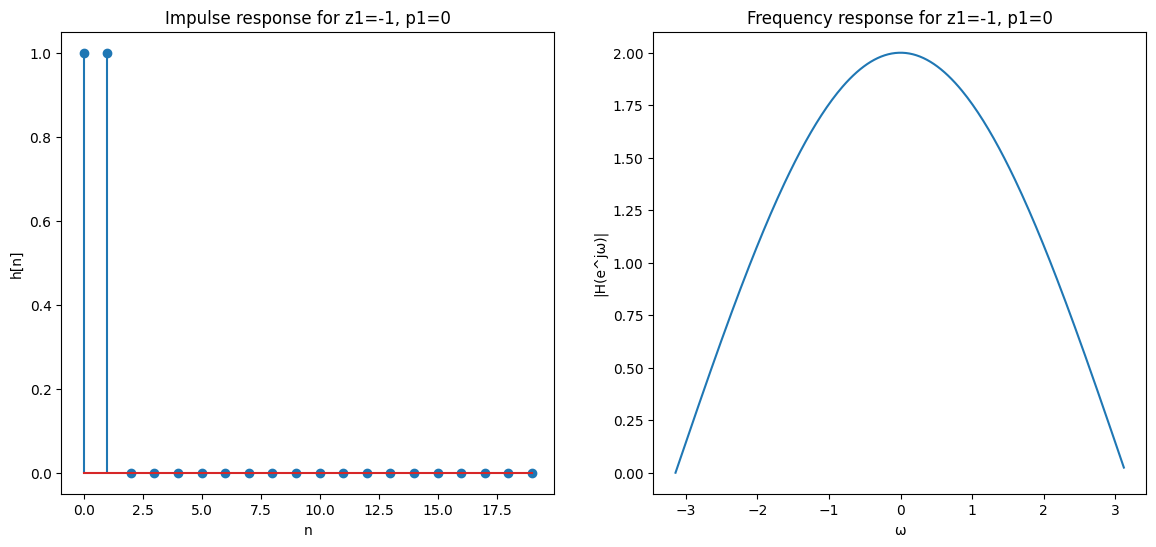

In [30]:
# Values of z1 to test
z1 =[0.2, 0.8, 1, 1.1, -0.8, -1]
# Fixed p1
p1 = 0

for z in z1:
    # Use the same function to plot the response
    plot_response(z, p1)

Zeros are the values of the numerator of the transfer function where it equals zero, causing the overall system response to become zero for specific input frequencies. They influence the transient and frequency response of the system by defining the points where certain frequencies are canceled or diminished.  

The impulse response reflects how zeros shape the system's transient behavior. While poles dictate the system's stability, zeros determine the initial dynamics and transient patterns. Zeros strongly influence the system's ability to pass or suppress specific frequencies. Their location in the \( z \)-plane determines the frequencies at which attenuation occurs.


- |z₁| < 1 - The system's initial response rises or decays depending on the zero's proximity to the origin, resulting in a quick transition. Lower frequencies are more prominent, and the system has a smoother frequency response curve.  

- |z₁| = 1 - The system exhibits oscillatory behavior or sustained peaks depending on the zero's angle. Zeros on the unit circle cancel specific frequencies completely, leading to sharp dips in the frequency response at those points.

- |z₁| > 1 - The system exhibits higher amplitude peaks or a prolonged transition in the time domain due to the influence of the distant zero. Higher frequencies dominate, and the response curve has a sharper roll-off at lower frequencies.


**Time Response:**
  The initial value \( h[0] = 1 \) is consistent due to the impulse input. However, the transient dynamics vary significantly depending on \( z₁ \):  
  - Zeros near the origin cause quick transitions.  
  - Zeros on or outside the unit circle result in oscillations or prolonged transitions.  

  Note: Due to the short duration of the impulse response, prolonged transitions cannot be fully captured.

**Frequency Response:**
  - Zeros inside the unit circle emphasize lower frequencies, creating a gradual frequency response curve.  
  - Zeros on the unit circle cancel specific frequencies, producing deep nulls in the frequency response.  
  - Zeros outside the unit circle highlight higher frequencies, leading to sharper transitions in the frequency plot.

### 3. 10-point pulse input

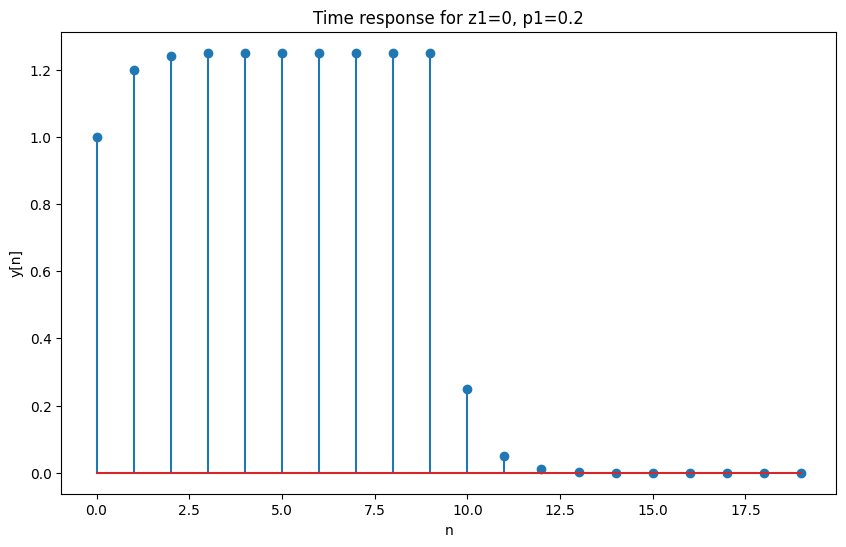

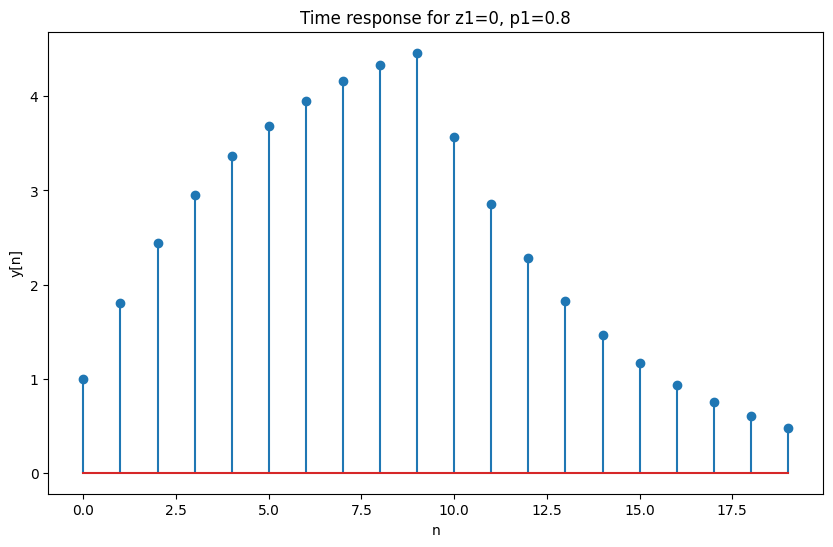

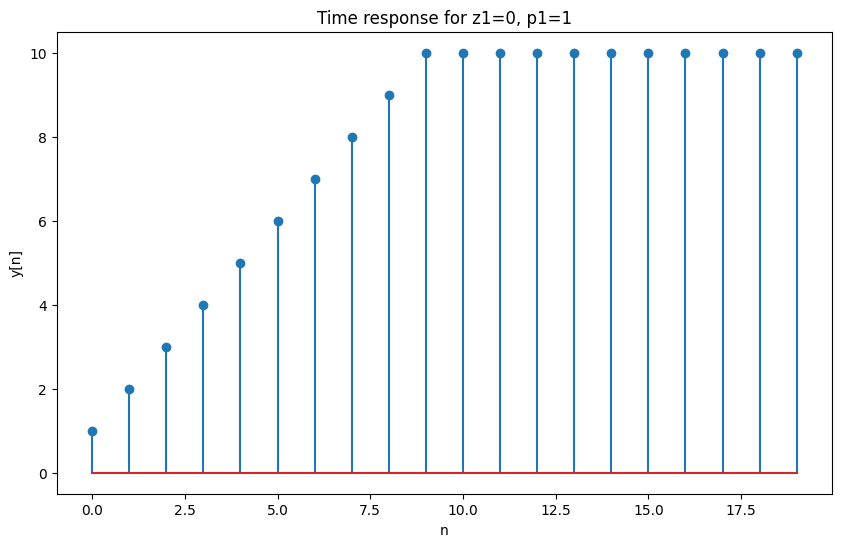

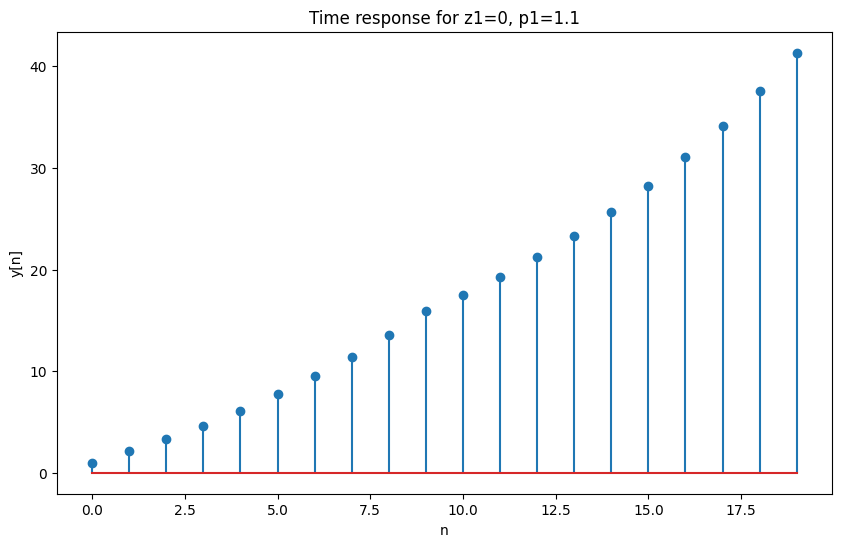

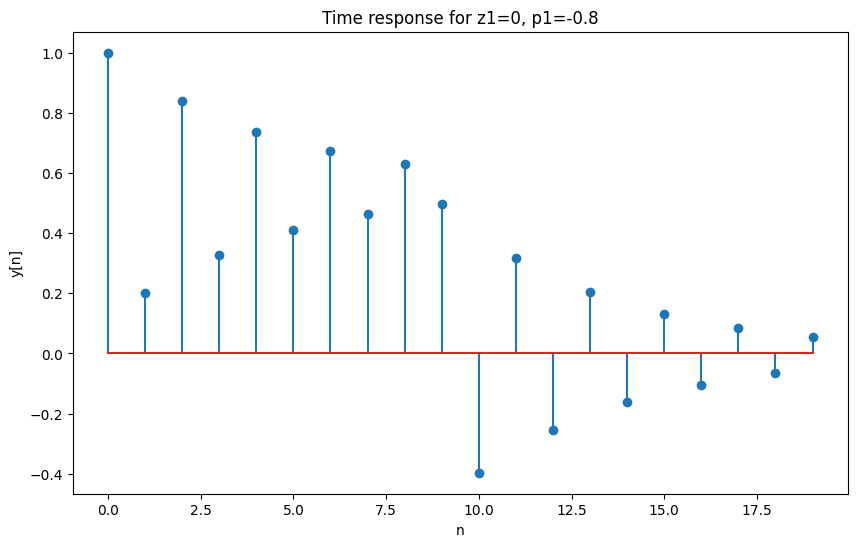

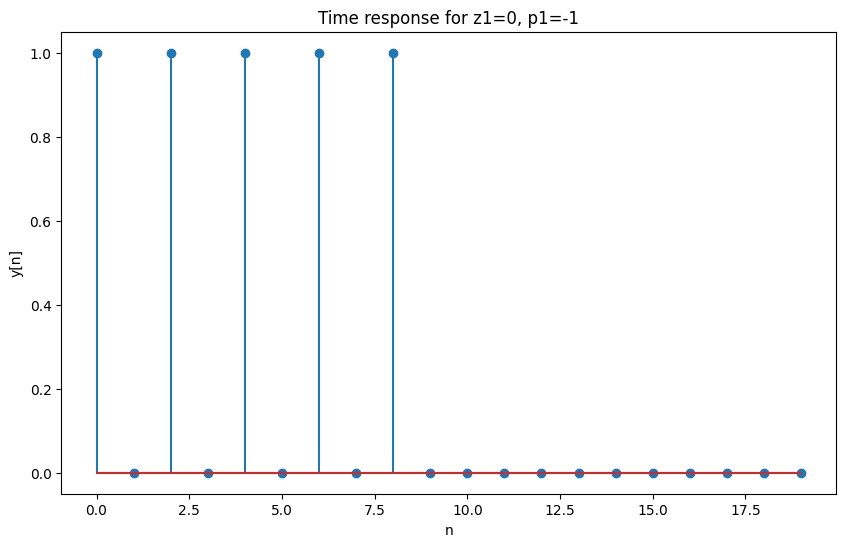

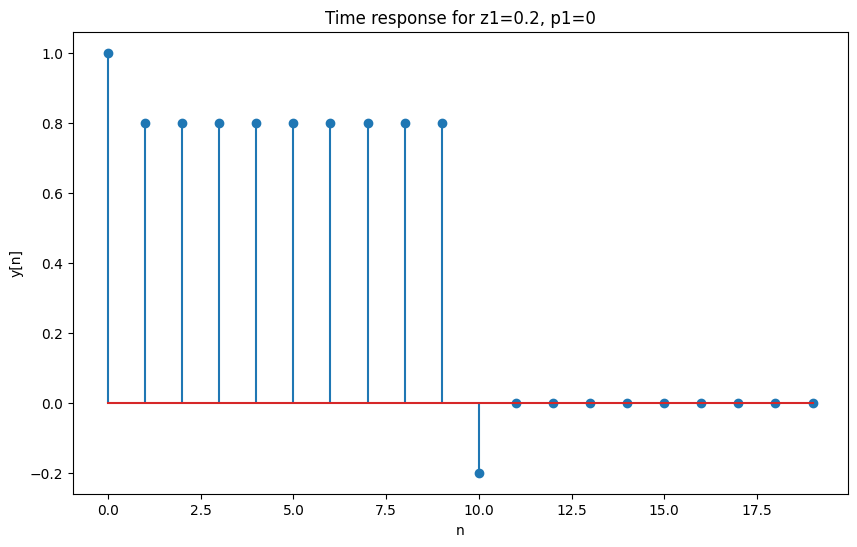

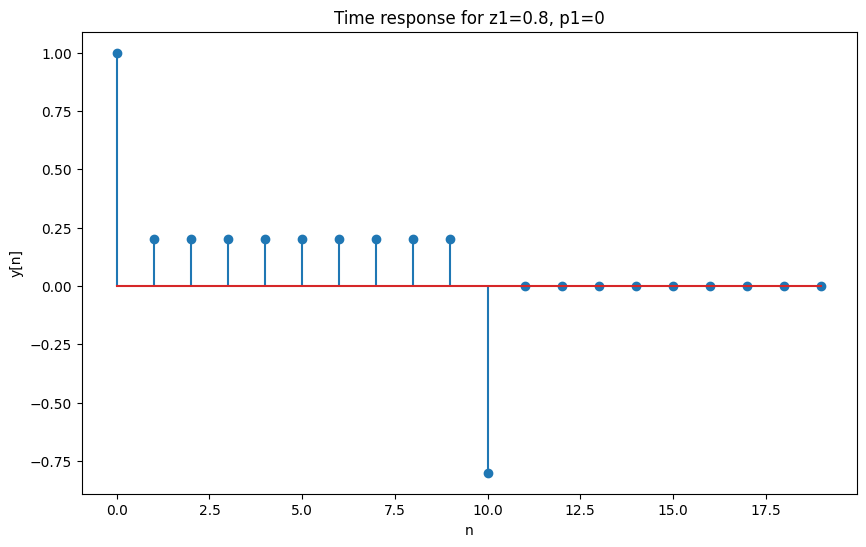

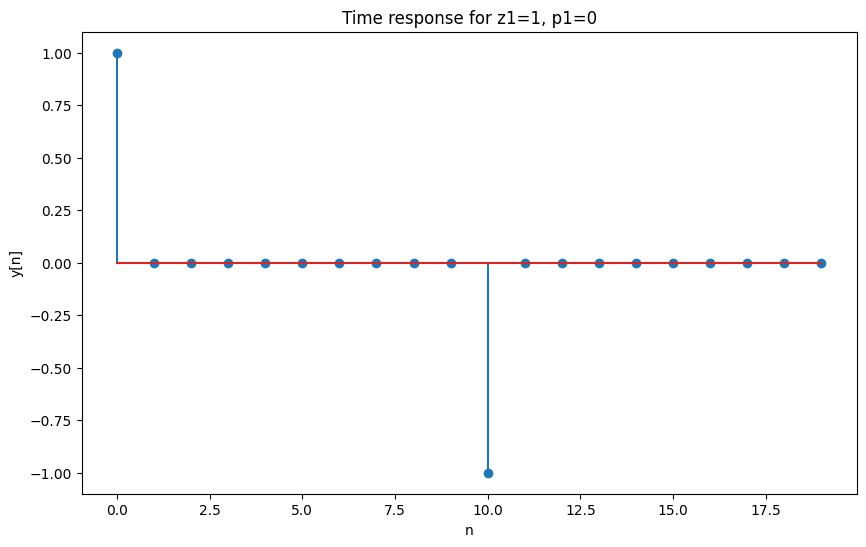

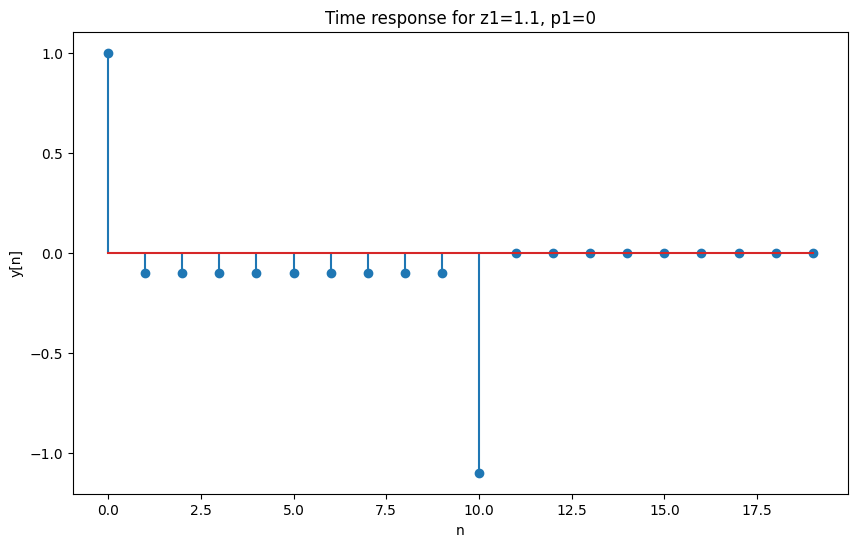

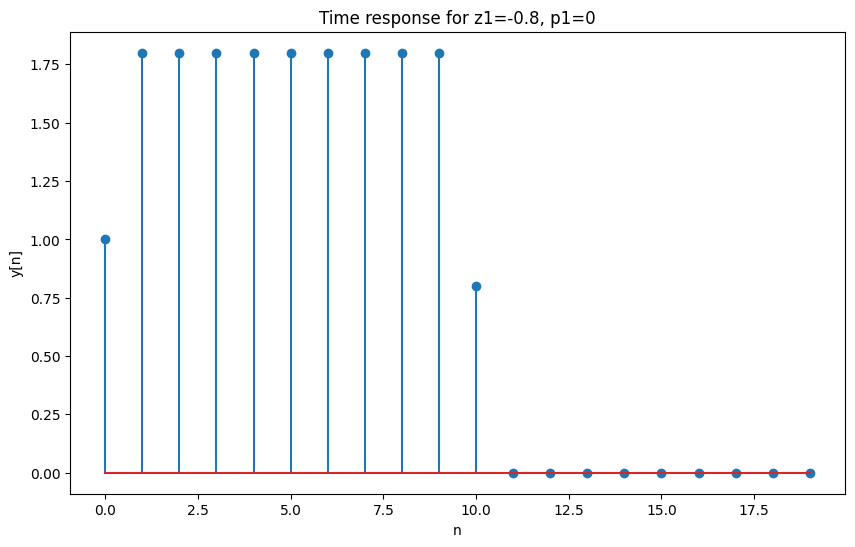

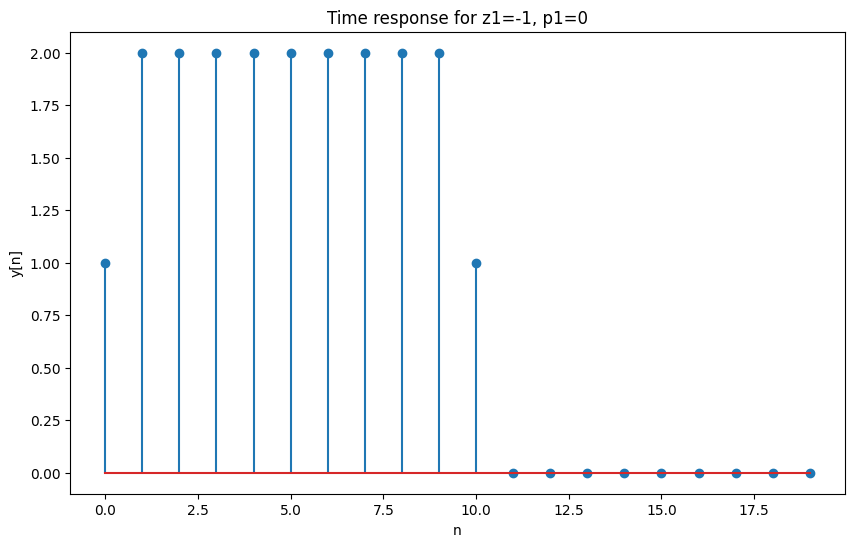

In [31]:
def plot_pulse_response(z1, p1):
    # Transfer function: H(z) = (z - z1) / (z - p1)
    G = 1

    # Parameters: array of zeros, array of poles, gain
    # Discrete linear time-invariant system 
    system = signal.dlti([z1], [p1], G)
    
    # Step response with 20 points
    t, y = system.step(n=20)
    y = np.squeeze(y)
    
    # Adjust to represent the 10-point pulse input
    pulse_response = y.copy()
    pulse_response[10:] -= y[:-10]
    
    # Plotting the pulse response
    plt.figure(figsize=(10, 6))
    plt.stem(t, pulse_response)
    plt.xlabel('n')
    plt.ylabel('y[n]')
    plt.title(f'Time response for z1={z1}, p1={p1}')
    plt.show()

# Repeat Task 1: Varying p1 with z1 fixed at 0
p1_values = [0.2, 0.8, 1, 1.1, -0.8, -1]
z1 = 0

for p1 in p1_values:
    plot_pulse_response(z1, p1)

# Print separator
print("\n" + "="*150 + "\n")

# Repeat Task 2: Varying z1 with p1 fixed at 0
z1_values = [0.2, 0.8, 1, 1.1, -0.8, -1]
p1 = 0

for z1 in z1_values:
    plot_pulse_response(z1, p1)

Instead of using the impulse response, Task 3 redefines the system to utilize a 10-point pulse input. The step input forces the system to accumulate its response over time. This contrasts with the impulse response, which focuses on the immediate transient behavior of the system. Capturing both transient and steady-state behaviours.

- |p1|<1: The response settles quickly to the steady state, showing an exponential rise due to the step input.

- |p1|=1: Oscillations are sustained, indicating a system on the edge of stability. The step input highlights the resonant frequency of the system.

- |p1|>1: The response grows exponentially, emphasizing the instability caused by the poles' location outside the unit circle.

- |z1|<1: The response has a smooth rise or decay, showing quick attenuation of higher frequencies. The zero near the origin cancels high-frequency components effectively.

- |z1|=1: Specific frequencies are suppressed, creating distinct oscillations or peaks in the response.

- |z1|>1: The response shows slower transitions due to the dominance of higher frequencies introduced by zeros outside the unit circle.


Poles determine stability and overall growth or decay trends. Stable poles ensure a bounded response, while unstable poles cause unbounded growth.

Zeros shape transient behavior. They define the frequencies emphasized or canceled, influencing how the system transitions to steady-state or oscillates.


### 4. All-pole Second-order System

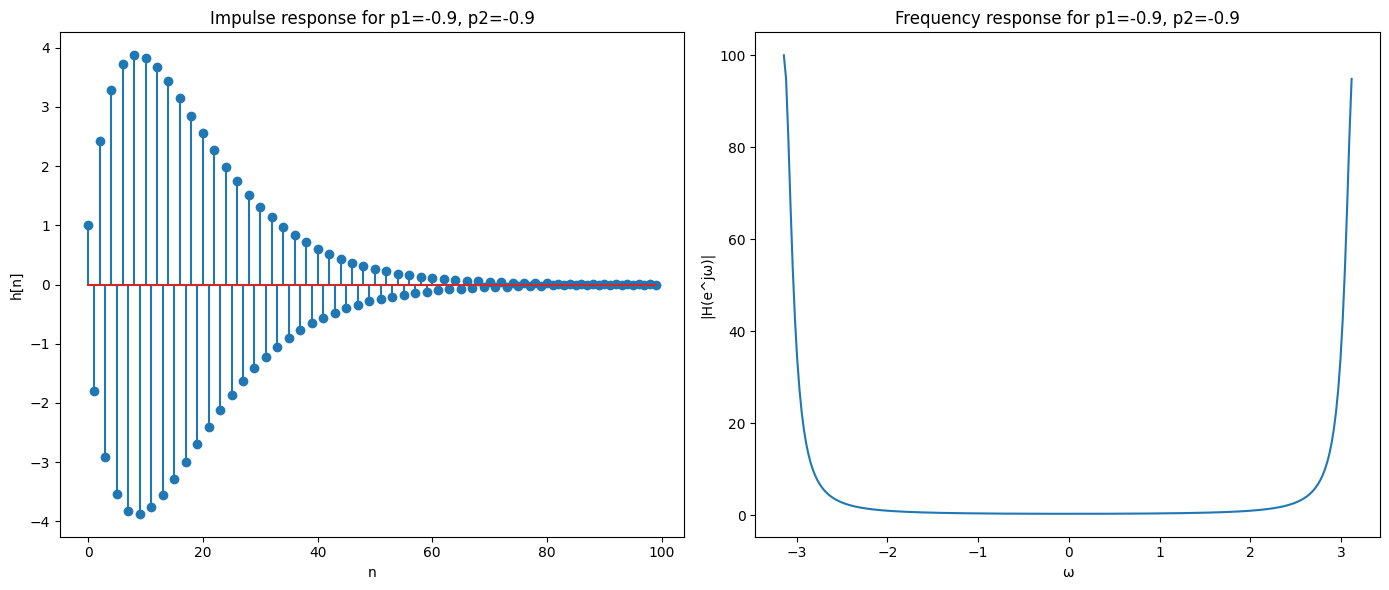

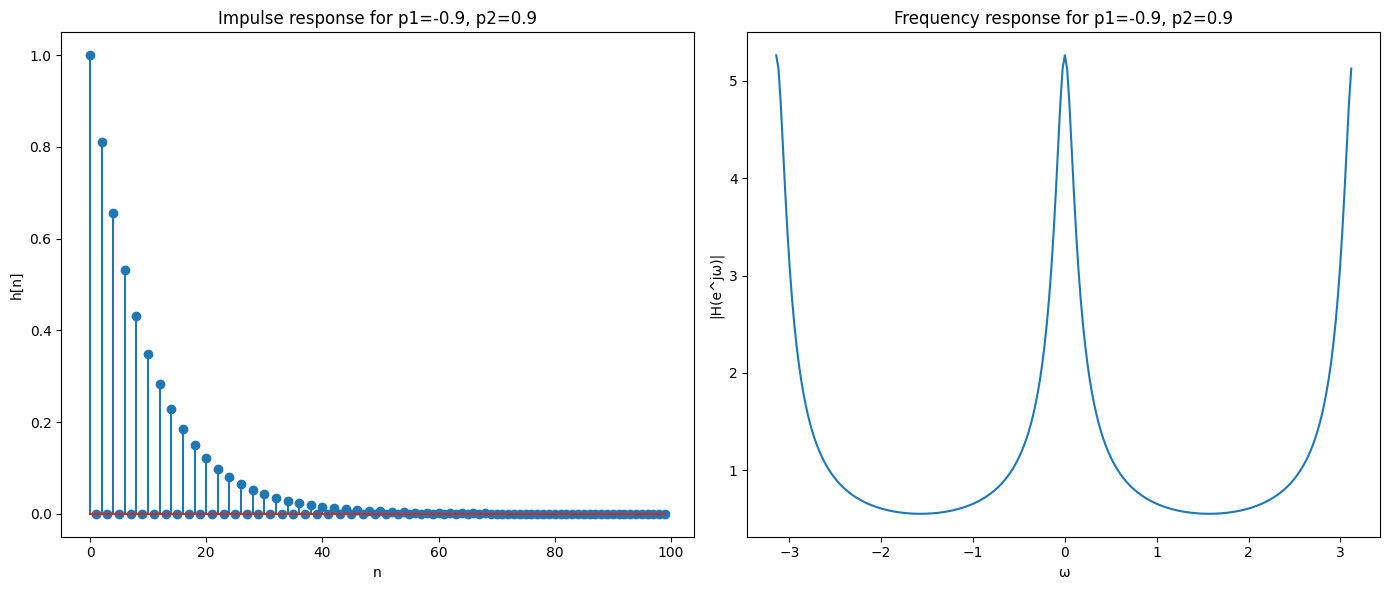

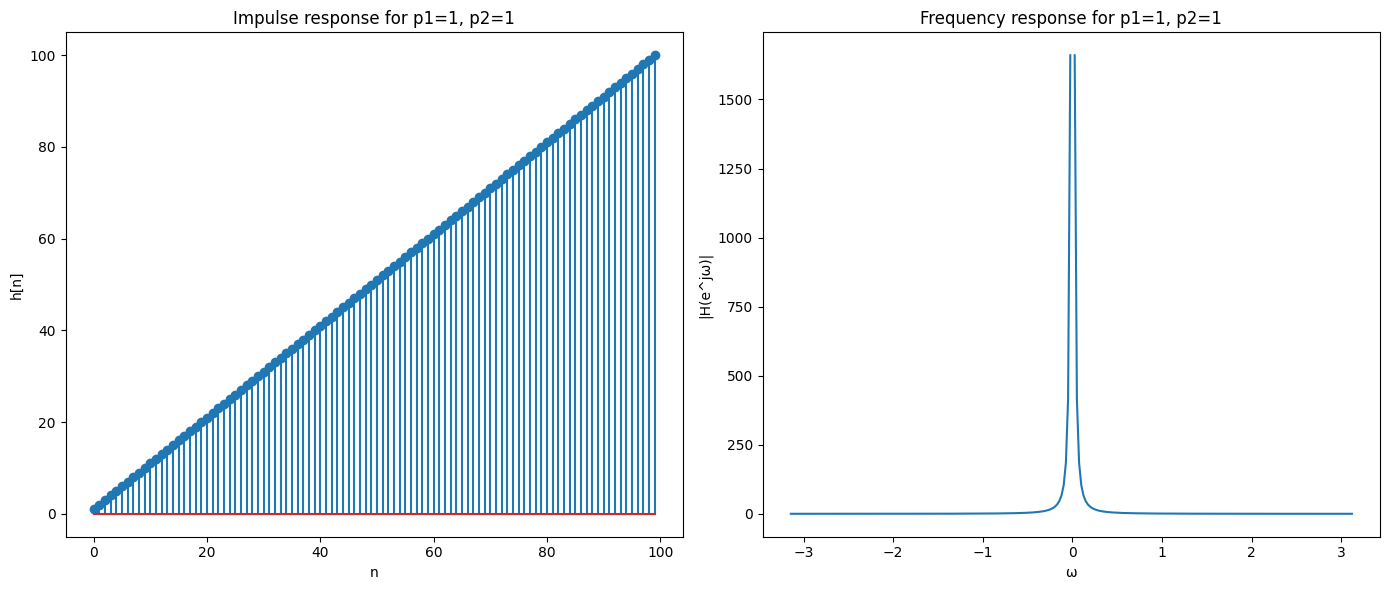

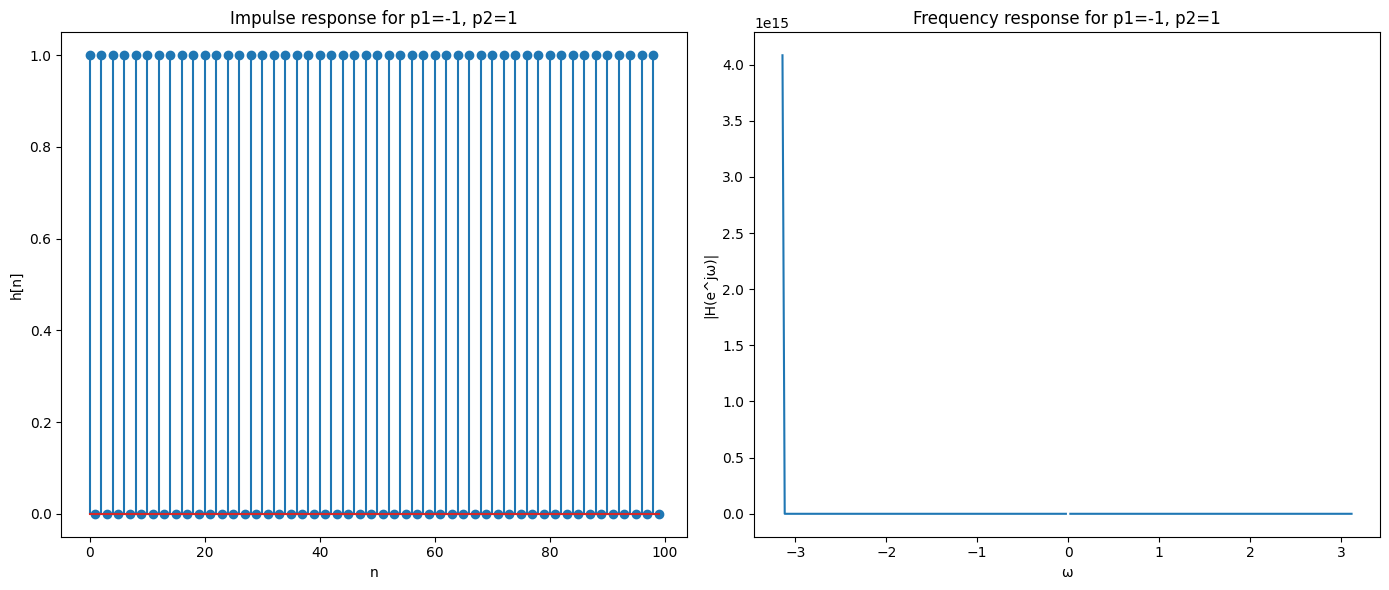

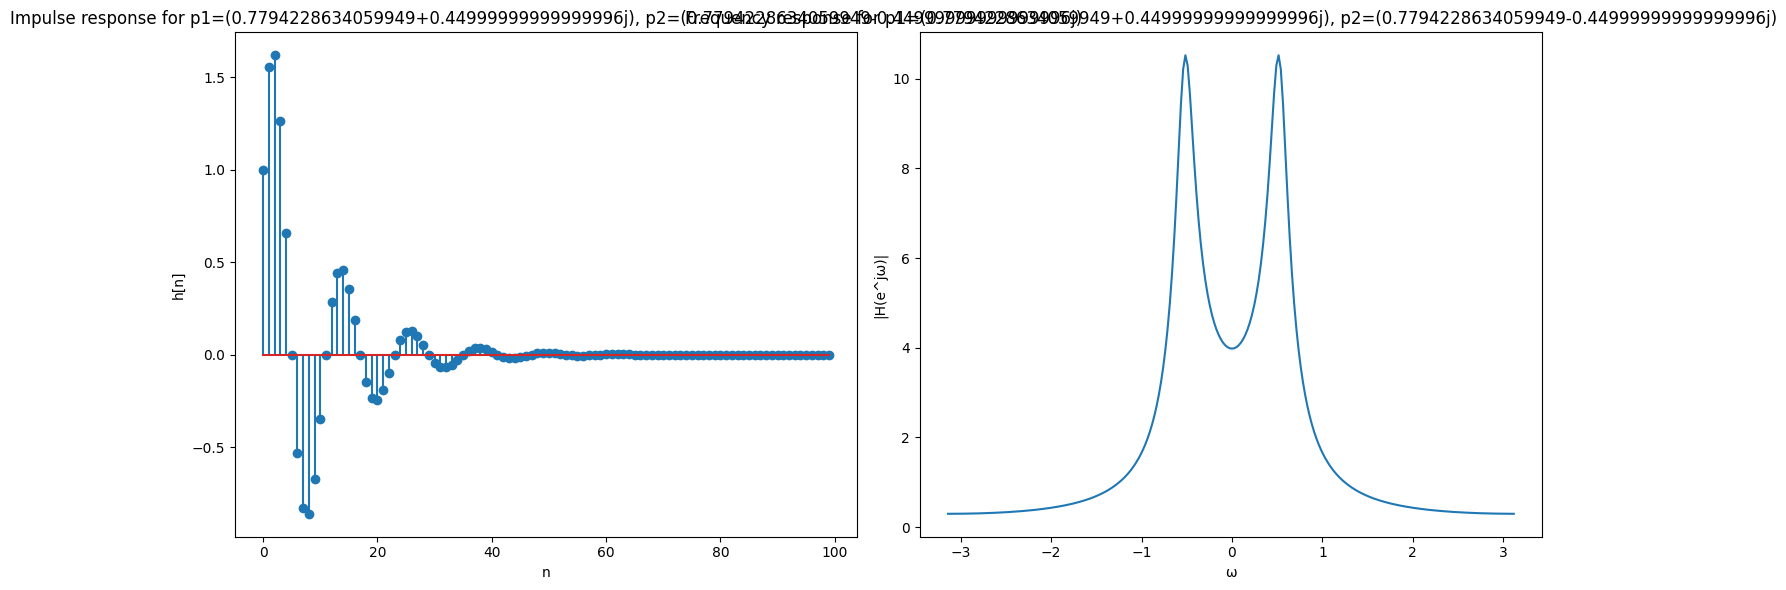

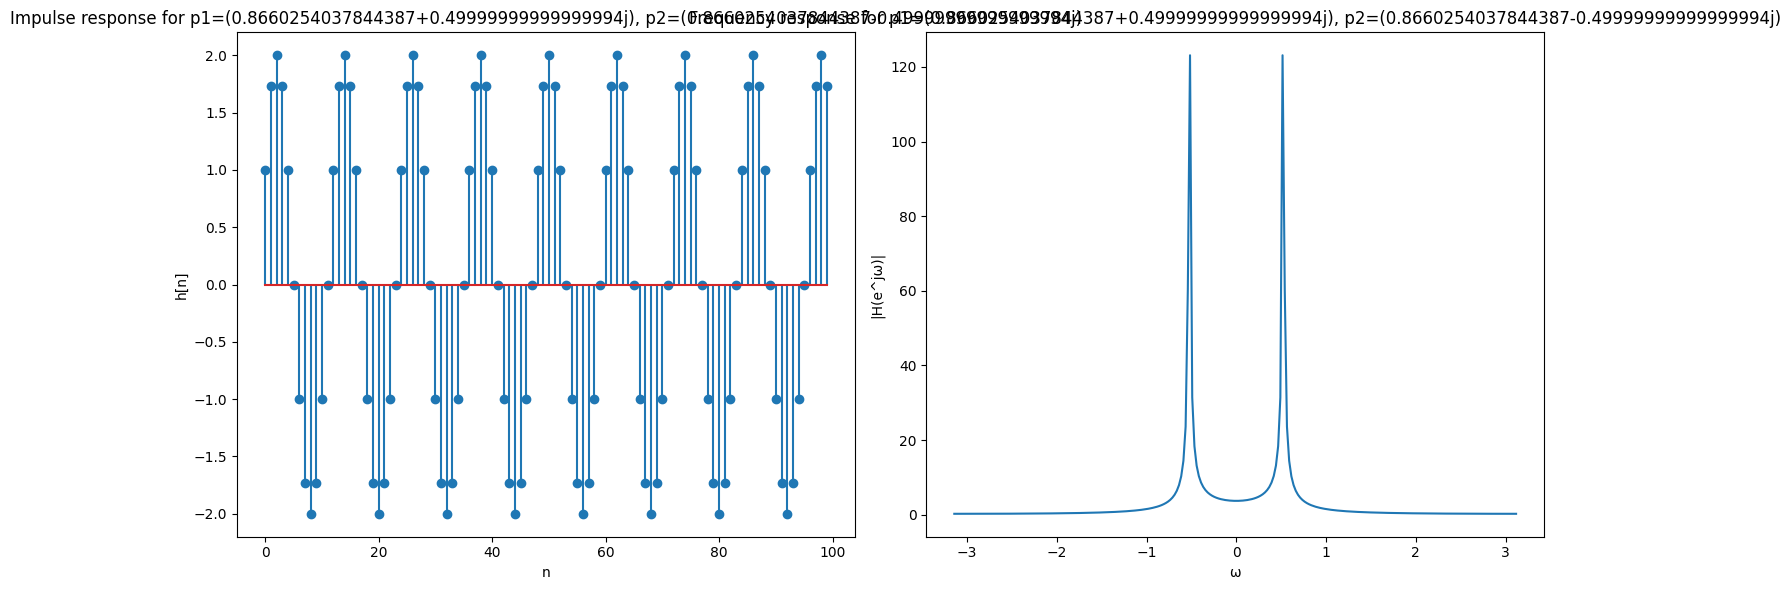

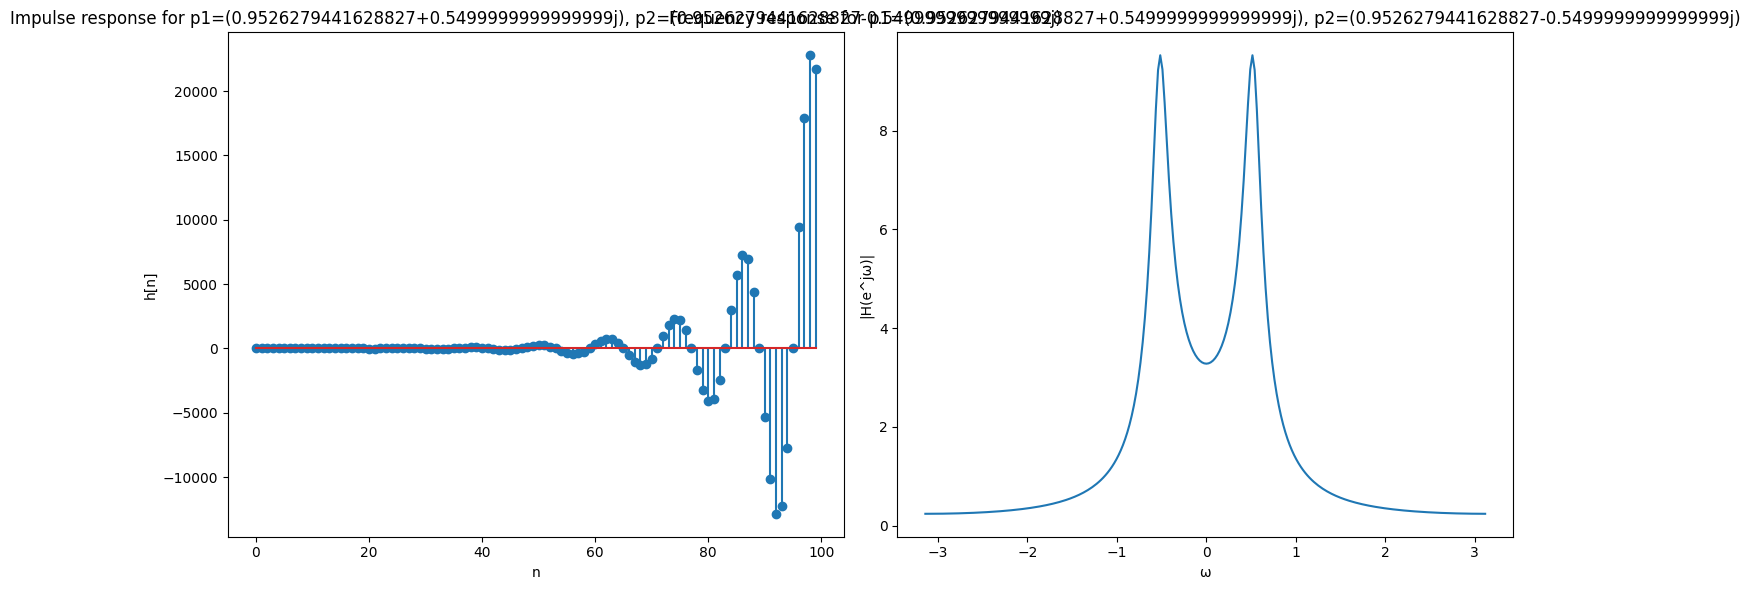

In [32]:
def second_order_response(p, z):
    # Transfer function: H(z) = z^2 / ((z - p1)(z - p2))
    G = 1

    # parameters: array of zeros, array of two poles, gain
    # Discrete linear time-invariant system
    system = signal.dlti(z, p, G)

    # Impulse response with a longer 100-point sequence
    n, h = system.impulse(n=100)
    h = np.squeeze(h)

    # Frequency response
    w = np.linspace(-np.pi, np.pi, num=256, endpoint=False)
    _, H = system.freqresp(w)

    # Plotting the responses
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.stem(n, h)
    ax1.set_xlabel('n')
    ax1.set_ylabel('h[n]')
    ax1.set_title(f'Impulse response for p1={p[0]}, p2={p[1]}')

    ax2.plot(w, abs(H))
    ax2.set_xlabel('ω')
    ax2.set_ylabel('|H(e^jω)|')
    ax2.set_title(f'Frequency response for p1={p[0]}, p2={p[1]}')

    plt.tight_layout()
    plt.show()

    # Determine null and peak frequencies
    null_frequencies = w[np.isclose(abs(H), 0, atol=1e-2)]
    peak_frequencies = w[np.isclose(abs(H), np.max(abs(H)), atol=1e-1)]


    return null_frequencies, peak_frequencies

# Values of p1 and p2 to test
p1_values = [-0.9, -0.9, 1, -1, 0.9*np.exp(1j*np.pi/6), np.exp(1j*np.pi/6), 1.1*np.exp(1j*np.pi/6)]
p2_values = [-0.9, 0.9, 1, 1, 0.9*np.exp(-1j*np.pi/6), np.exp(-1j*np.pi/6), 1.1*np.exp(-1j*np.pi/6)]

for p1, p2 in zip(p1_values, p2_values):
    null_frequencies, peak_frequencies = second_order_response([p1, p2], [0,0])


A second-order system contains two poles (or two zeros). The behavior of the system is shaped by the interaction of these poles/zeros, introducing additional complexity compared to first-order systems.

We can see that the the issue of stability remains consistent as the first order system. It is determined by the magnitude of both poles now and if any pole lies outside the unit circle (|p1|>1) the system becomes unstable.

We now may distingusih with pair of poles cause oscillatory behavior and which dont.
- p₁| ≠ |p₂| - real poles have slower transitions and are non oscillatory
- p₁| = |p₂| - complex poles have faster transitions and are oscillatory

**Time response**
The interaction of two poles has the potential to increase the overall amplitude response of the system. This enhanced amplitude can manifest as stronger resonances or more pronounced transient behavior.

** Frequency response **
- Resonant peaks occur at frequencies where the poles interact, representing the system's sensitivity to input signals at those frequencies. These peaks correspond to regions of high amplitude in the frequency response.

- Null frequencies occur where poles and zeros interact, representing the frequencies where the system is least sensitive to input signals. These nulls are dips in the frequency response curve.

### 5. Two Zeros, Two Poles

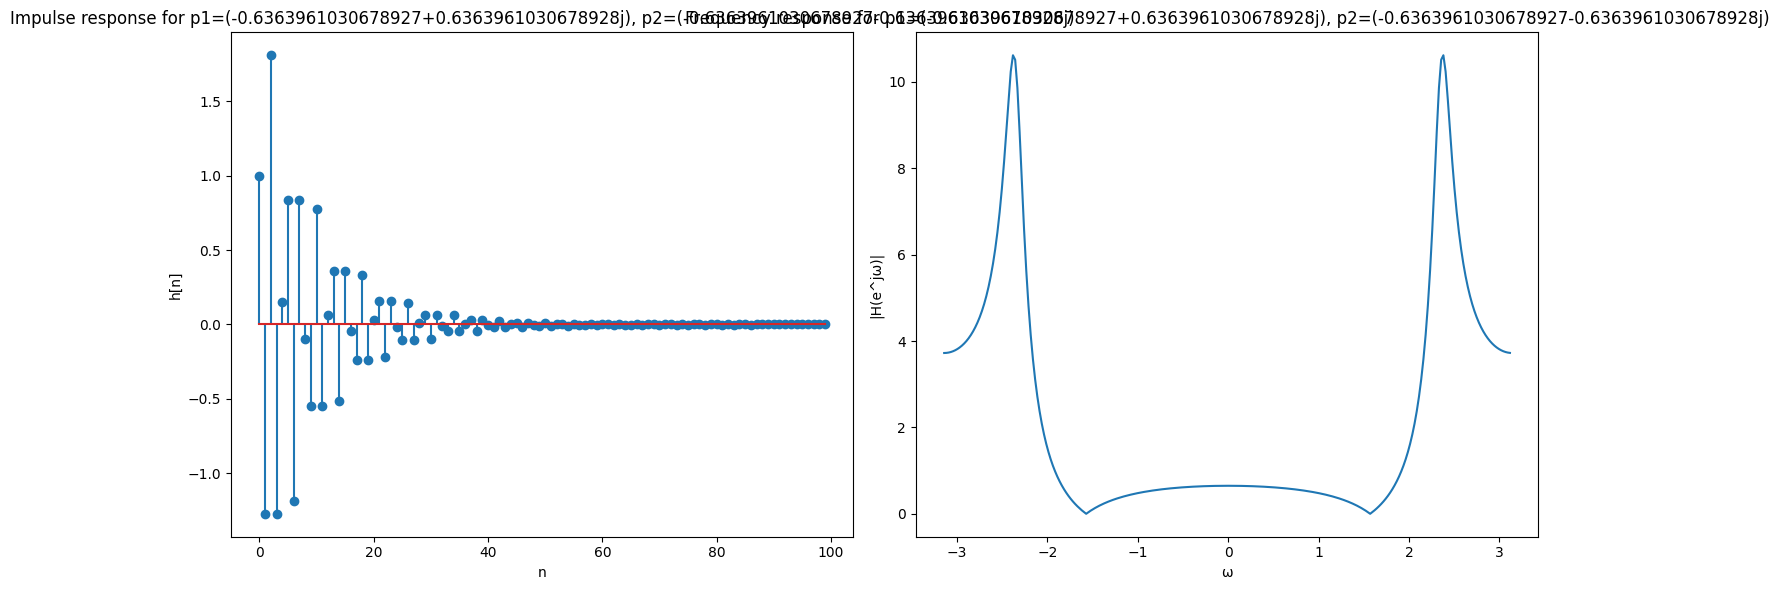

Null frequencies (where |H(ω)| = 0): [-1.57079633  1.57079633]
Peak frequencies (where |H(ω)| is at a maximum): [-2.38073818  2.38073818]


In [33]:

# Given zeros and poles
z1 = np.exp(1j * np.pi / 2)
z2 = np.exp(-1j * np.pi / 2)
p1 = 0.9 * np.exp(1j * 3 * np.pi / 4)
p2 = 0.9 * np.exp(-1j * 3 * np.pi / 4)

# Compute the response and determine null and peak frequencies
null_frequencies, peak_frequencies = second_order_response([p1, p2], [z1, z2])

# Print the results
print("Null frequencies (where |H(ω)| = 0):", null_frequencies)
print("Peak frequencies (where |H(ω)| is at a maximum):", peak_frequencies)

The given second-order system has:
- (z1, z2) = 1(π/2, −π/2), so they are postioned on the unit circle at 90° and -90°
- (p1, p2) = 0.9(3π/4, −3π/4), so they are position just inside the unit circle at 135° and -135°
We expect the null frequencies to match the locations of the zeros on the unit circle, which are -π/2 and π/2. This is confirmed in the frequency response plot, showing these nulls. For the peak frequencies, we expect them at the poles due to their positions inside the unit circle, which are -3π/4 and 3π/4, as observed in the plot.

The time domain plot of the system's impulse response shows an initial transient h[n]=1 followed by oscillations with a gradually decreasing amplitude, reflecting the influence of both the zeros and poles on the system's dynamics.

### 6. Second-order Notch Filter

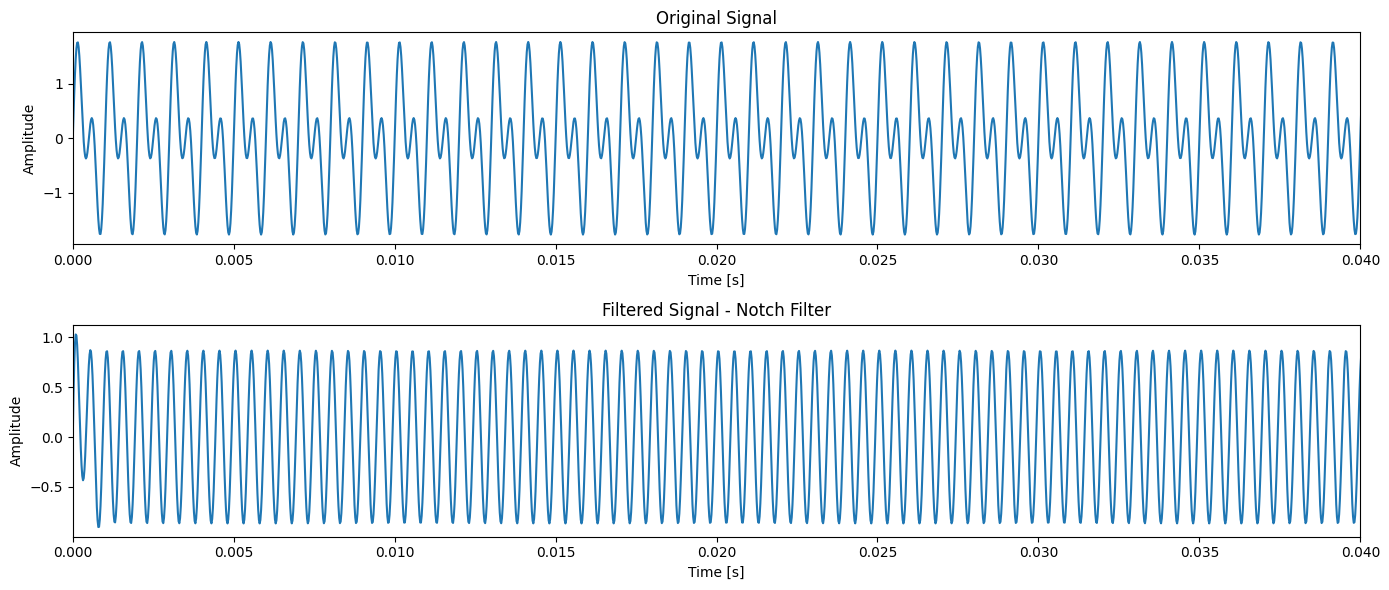

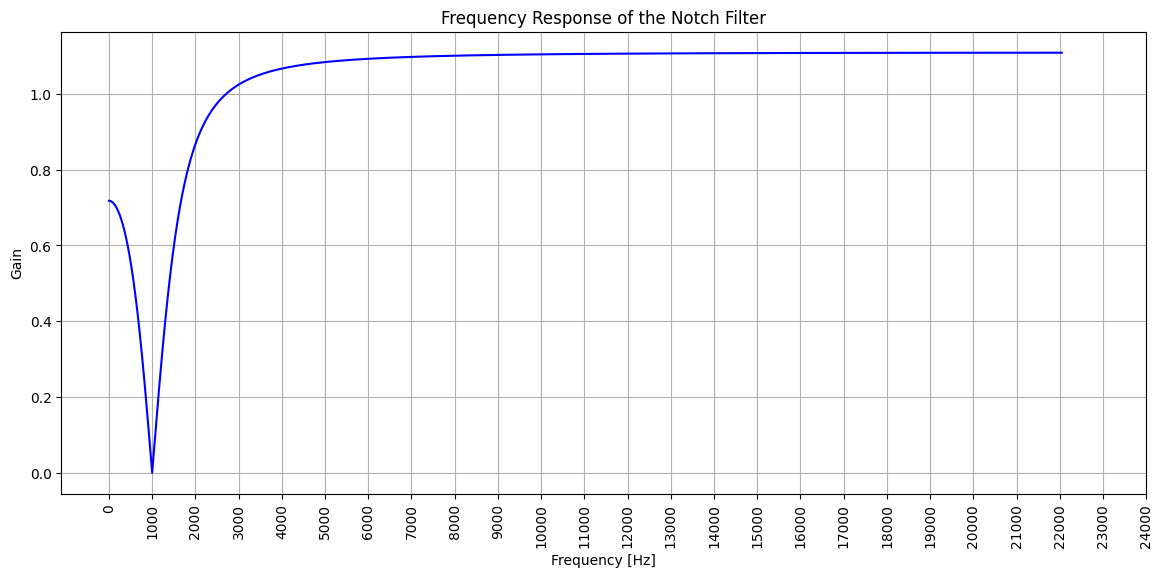

In [34]:
def design_notch_filter(f0, Fs):
    # Calculate the normalized notch frequency
    omega_0 = 2 * np.pi * f0 / Fs

    # Calculate the zeros and poles
    z1 , z2 = np.exp(1j * omega_0), np.exp(-1j * omega_0)
    p1, p2 = 0.9*z1, 0.9*z2

    # Transfer function coefficients
    b = np.poly([z1, z2])  # Numerator coefficients
    a = np.poly([p1, p2])  # Denominator coefficients

    return b, a

# Parameters
Fs = 44100  # Sampling frequency (Hz)
f0 = 1000   # Notch frequency (Hz)

# Generate a test signal: sum of 1 kHz and 2 kHz sine waves
t = np.linspace(0, 1, Fs, endpoint=False)
test_signal = np.sin(2 * np.pi * 1000 * t) + np.sin(2 * np.pi * 2000 * t)

# Design the notch filter
b, a = design_notch_filter(f0, Fs)

# Apply the notch filter to the test signal
filtered_signal = signal.lfilter(b, a, test_signal)


# Plot the original and filtered signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, test_signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.xlim([0, 0.04])
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal - Notch Filter')
plt.xlabel('Time [s]')
plt.xlim([0, 0.04])
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Frequency response of the filter
w, h = signal.freqz(b, a, worN=8000)
plt.figure(figsize=(14, 6))
plt.plot(0.5 * Fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of the Notch Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.xticks(np.arange(0, 25000, 1000))
plt.xticks(rotation=90)
plt.grid()
plt.show()



A design_notch_filter function was implemented to create a notch filter that removes a specific frequency from an audio signal while preserving others. The zeros and poles were chosen based on Task 5 observations, placing zeros on the unit circle and poles just inside. The normalized notch frequency (omega) was calculated using the sampling and target notch frequencies, and the numerator and denominator coefficients were derived using NumPy's poly function.

To test the filter, a test signal was created by combining 1 kHz and 2 kHz sine waves. The filter was then applied to this signal using scipy.signal.lfilter. Time-domain plots were generated to visually confirm the filter's effectiveness, and the filter's frequency response was also computed and displayed.

The original signal is a sum of two sine waves at 1 kHz and 2 kHz. This is seen in the time domain plot as it oscillates between around -1.5 and 1.5, reflecting the presence of both sinisoidal components.

The filtered signal is the result of applying the designed notch filter to the original signal. There is a very short initial transient response, which is the same as the original signal, but this quiclky settles to a steady state. Where the 1kHz component is filtered out, leaving only the 2kHz component. And the amplitude of the 2 kHz component is slightly reduced due to the filter's frequency response. Leaving the presence of only a single 2kHz sinisoidal component in the plot.

The frequency response of the notch filter shows a sharp notch at the notch frequency of 1 kHz. This indicates that the filter effectively attenuates the signal at this frequency, which is consistent with the filtered signal plot.